In [2]:
from PIL import Image

im = Image.open('test.png')
im.size

# 对于 opencv
# OpenCV 的话，不再需要我们手动转格式，它直接读入图片后，就是以 NumPy 数组的形式来保存数据的
# import cv2

# im_cv = cv2.imread('test.png')
# im_cv.shape

(270, 148)

In [3]:
import numpy as np

im_pillow = np.asarray(im)

im_pillow.shape


(148, 270, 3)

# opencv 和 pillow 读入图片的区别
1. Pillow 读入的图片是以 RGB 格式保存的，而 OpenCV 读入的图片是以 BGR 格式保存的。
2. Pillow 读入的图片数组的形状是 (高度, 宽度, 通道数)，而 OpenCV 读入的图片数组的形状是 (高度, 宽度, 通道数)。
3. pillow 需要主动转换为 numpy 数组，而 opencv 直接读入的就是 numpy 数组。

In [5]:
im_pillow_c1 = im_pillow[:, :, 0]
im_pillow_c2 = im_pillow[:, :, 1]
im_pillow_c3 = im_pillow[:, :, 2]

print(im_pillow_c1.shape)

# Zero channel 1 is the channel number with all zeros
zeros = np.zeros((im_pillow.shape[0], im_pillow.shape[1], 1))
print(zeros.shape)

(148, 270)
(148, 270, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


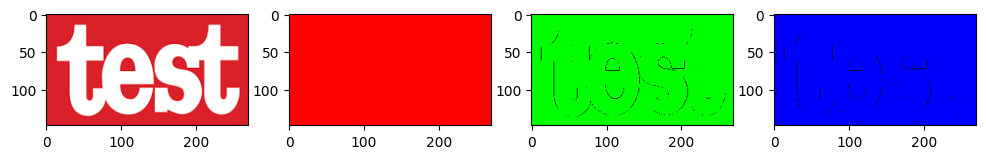

In [6]:
# 数组拼接开始

# concatenate 方法用于沿指定轴连接数组序列
im_r = np.concatenate((im_pillow_c1[:, :, np.newaxis], zeros, zeros), axis=2)
im_g = np.concatenate((zeros, im_pillow_c2[:, :, np.newaxis], zeros), axis=2)
im_b = np.concatenate((zeros, zeros, im_pillow_c3[:, :, np.newaxis]), axis=2)

# plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
ax[0].imshow(im_pillow)
ax[1].imshow(im_r)
ax[2].imshow(im_g)
ax[3].imshow(im_b)

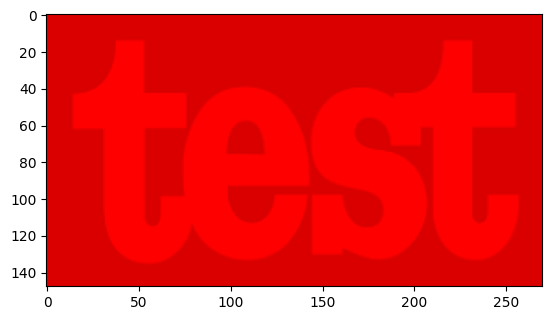

In [8]:
# Easy way to get the R, G, B channels
from PIL import Image
im = Image.open('test.png')

im = Image.open('test.png')
im_pillow = np.asarray(im)
# Cannot to write the im_pillow[:, :, 0] = 0 because of the array is read-only we need to copy it first
# im_pillow[:, :, 1] = 0

# np.array() 属于深拷贝，np.asarray() 则是浅拷贝
# 浅拷贝或称视图，指的是与原数组共享数据的数组，请注意，只是数据，没有说共享形状。
# 我们通过view()方法可以显式地创建一个浅拷贝：
im_pillow = np.array(im)
im_pillow[:, :, 1] = 0
im_pillow[:, :, 2] = 0

plt.imshow(im_pillow)

# 在实际realtime应用中，注意数据如果只进行了浅拷贝操作，修改数据时会影响到原始数据。确保数据正确性时，建议使用深拷贝。

# 多分类问题的图形处理

有 1000 个类别的 ImageNet。也许你会想到遍历这个数组，求出最大值对应的索引。或者找出概率最大的前 5 个类别？

## Argmax Vs Argmin
NumPy 的 argmax(a, axis=None) 方法可以为我们解决求最大值索引的问题。如果不指定 axis，则将数组默认为 1 维。

## Argsort
数组排序后返回原数组的索引
argsort(a, axis=-1, kind=None): 从小到大的排序，返回的是对应元素在原数组中的索引
例如：
```python
import numpy as np
a = np.array([3, 1, 2])
print(np.argsort(a))
# 输出: [1 2 0]
```
argsort(a, axis=1, kind=None): 按行排序，返回的是对应元素在原数组中的索引
例如：
```python
import numpy as np
a = np.array([[3, 1, 2], [6, 7, 5]])
print(np.argsort(a, axis=1))    
# 输出: [[1 2 0]
#        [2 0 1]]
```

![mdfiles/image1.png](mdfiles/image1.png)

In [9]:
# probs

probs = np.array([0.1, 0.3, 0.25, 0.35])
# 降序排序索引
sorted_indices = np.argsort(-probs)
# 升序排序索引
# sorted_indices = np.argsort(probs)

print(sorted_indices)  # 输出: [3 1 2 0]
# print the 3 top indices
top_3_indices = sorted_indices[:3]
print(top_3_indices)  # 输出: [3 1 2]

[3 1 2 0]
[3 1 2]


In [ ]:
# 给定数组 scores，形状为（256，256，2）
# scores[: , :, 0] 与 scores[:, :, 1] 对应位置元素的和为 1，
# 现在我们要根据 scores 生产数组 mask，要求 scores 通道 0 的值如果大于通道 1 的值，则 mask 对应的位置为 0，否则为 1。

scores = np.random.rand(256, 256, 2)
scores[:, :, 1] = 1 - scores[:, :, 0]  # 确保两个通道的和为 1
mask = np.argmax(scores, axis=-1)  # 取最大值的索引作为 mask 的值
print(mask)  # 输出: (256, 256)

[[0 1 1 ... 1 0 1]
 [0 1 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 0 1 0]]
